In [1]:
# make necessary imports

import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fake-or-real-news/fake_or_real_news.csv


# Read The Dataset

In [3]:
df=pd.read_csv('/kaggle/input/fake-or-real-news/fake_or_real_news.csv')

# Check the Head of the dataset

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# distribution of classes for prediction

In [5]:
def create_distribution(dataFile):
    return sns.countplot(x='label', data=dataFile, palette='hls')

<AxesSubplot:xlabel='label', ylabel='count'>

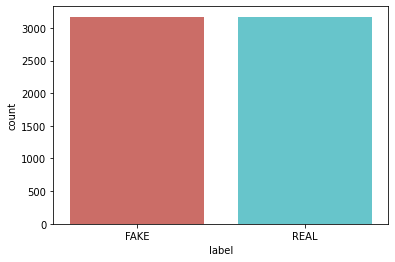

In [6]:
create_distribution(df)

# data integrity check (missing label values)

In [7]:
def data_qualityCheck():
    print("Checking data qualitites...")
    df.isnull().sum()
    df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
check finished.


# the dataset does not contains missing values therefore no cleaning required

In [8]:
# Separate the labels and set up training and test datasets

# Get the labels
x=df['text']
y = df['label']
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

# Split the dataset

In [9]:
#Split the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=53)

### before applying ML algorithm, we have to convert our text data into numbers or vector representation


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
# Learn the vocabulary dictionary and return term-document matrix

In [12]:
count_train = count_vectorizer.fit_transform(X_train)

In [13]:
count_vectorizer

CountVectorizer(stop_words='english')

### get CountVectorizer_stats

In [14]:
#vocab size
print(count_train.shape)

(4877, 60386)


# check vocabulary using below command

In [15]:
print(count_vectorizer.vocabulary_)

{'bni': 7647, 'store': 51365, 'nov': 37475, '2016': 699, 'muslims': 36079, 'trying': 55110, 'claim': 10963, 'hebrew': 25010, 'language': 30937, 'dead': 14375, 'sea': 47735, 'scrolls': 47687, 'arab': 4482, 'muslim': 36076, 'origin': 38472, 'let': 31526, 'straight': 51413, 'demonstrably': 15041, 'written': 59247, 'palestinians': 39189, 'saying': 47223, 'ancient': 3860, 'documents': 16669, 'like': 31770, 'jerusalem': 29050, 'temple': 53243, 'mount': 35703, 'holiest': 25727, 'site': 49267, 'judaism': 29381, 'ridiculous': 45767, 'campaign': 9290, 'delegitimize': 14872, 'israel': 28581, 'today': 54118, 'carmel': 9601, 'shama': 48373, 'hacohen': 24223, 'ambassador': 3617, 'united': 56124, 'nations': 36455, 'education': 17757, 'scientific': 47512, 'cultural': 13791, 'organization': 38442, 'unesco': 55942, 'said': 46781, 'raised': 43513, 'matter': 33648, 'informally': 27559, 'recent': 44088, 'meeting': 34063, 'intergovernmental': 28051, 'committee': 11818, 'promoting': 42385, 'return': 45493, '

# Transform the test set


In [16]:

count_test = count_vectorizer.transform(X_test)

# create tf-df frequency features
# Initialize a TfidfVectorizer

# max_df removes those words which appear in more than 70% of the articles

In [17]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data 

In [18]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [19]:
tfidf_train.shape

(4877, 60386)

In [20]:
#get train data feature names 
tfidf_train

<4877x60386 sparse matrix of type '<class 'numpy.float64'>'
	with 1282489 stored elements in Compressed Sparse Row format>

## print first 10 rows

In [21]:
tfidf_train.A[0:10]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.04295475, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Transform the test set 

In [22]:
tfidf_test = tfidf_vectorizer.transform(X_test)

# Now import Machine Learning Lib

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import KFold
import itertools

# Now Create Pipeline

In [24]:
## Pipeline is all about very first I have to apply tfidf_vectorizer, then I have to apply MultinomialNB on data

nb_pipeline = Pipeline([
        ('NBTV',tfidf_vectorizer),
        ('nb_clf',MultinomialNB())])

In [25]:
nb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('NBTV', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('nb_clf', MultinomialNB())])

# Perform classification on an array of test vectors X


In [26]:
predicted_nbt = nb_pipeline.predict(X_test)

In [27]:
predicted_nbt

array(['REAL', 'REAL', 'REAL', ..., 'REAL', 'REAL', 'FAKE'], dtype='<U4')

### checking score of the model

In [28]:
score = metrics.accuracy_score(y_test, predicted_nbt)
print('Accuracy:{}'.format(round(score*100,2)))

Accuracy:86.15


In [29]:
confusion_matrix(y_test,predicted_nbt)

array([[517, 185],
       [ 17, 739]])

### lets try with count vectorizer & Multinomial NB

In [30]:
nbc_pipeline = Pipeline([
        ('NBCV',count_vectorizer),
        ('nb_clf',MultinomialNB())])

In [31]:
nbc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('NBCV', CountVectorizer(stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [32]:
predicted_nbc = nbc_pipeline.predict(X_test)
score = metrics.accuracy_score(y_test, predicted_nbc)
print('Accuracy:{}'.format(round(score*100,2)))

Accuracy:89.51


In [33]:
confusion_matrix(y_test,predicted_nbc)

array([[600, 102],
       [ 51, 705]])

# building Passive Aggressive Classifier 
# Applying Passive Aggressive Classifier

# Initialize a PassiveAggressiveClassifier

In [34]:

linear_clf = Pipeline([
        ('linear',tfidf_vectorizer),
        ('pa_clf',PassiveAggressiveClassifier(max_iter=50))])
linear_clf.fit(X_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('pa_clf', PassiveAggressiveClassifier(max_iter=50))])

# Predict on the test set and calculate accuracy

In [35]:
pred = linear_clf.predict(X_test)

In [36]:
score = metrics.accuracy_score(y_test, pred)
print('Accuracy:{}'.format(round(score*100,2)))

Accuracy:94.24


In [37]:
confusion_matrix(y_test,pred)

array([[660,  42],
       [ 42, 714]])

## creating a classification report

In [38]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       702
        REAL       0.94      0.94      0.94       756

    accuracy                           0.94      1458
   macro avg       0.94      0.94      0.94      1458
weighted avg       0.94      0.94      0.94      1458



# Thanks If you Like This notebook Please Upvote it.